# LIBRARIES

In [1]:
## import torch
import torchvision
import torch
import torchvision.datasets as datasets
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from torch.nn import functional as F
import time
import pandas as pd 
from random import shuffle

# Pull in MNIST Data

## MNIST Data Label Generation

In [2]:
def gen_mnist():
    from sklearn.datasets.base import get_data_home 
    from sklearn.datasets import fetch_mldata
    print (get_data_home())
    mnist_raw = fetch_mldata('MNIST original', data_home=get_data_home())
    mnist=mnistData(mnist_raw.target,mnist_raw.data) 
    cnt=len(mnist.label)
    labelset=torch.tensor(mnist.label)
    labelset.shape
    dataset=torch.tensor(mnist.x,dtype=torch.float)
    number_columns=dataset.shape[1]
    dataset = dataset.view(-1,number_columns).float()/256.0
    print(dataset.shape)
    dataset=dataset.view(cnt,28,28)
    return(labelset, dataset)

# Classes

## Data Loaders

In [3]:
## CUSTOM DATA LOADER
from torch.utils.data.dataset import Dataset
class rgenData(Dataset):
    def __init__(self, randEnc, x, transform=None):
        self.randEnc= randEnc
        self.x=x 
    def __len__(self):
        z=self.x.shape[0]
        return  z
    def __getitem__(self, idx):
        randEnc=self.randEnc[idx]
        x=self.x[idx]
        return randEnc, x

## CUSTOM DATA LOADER
from torch.utils.data.dataset import Dataset
class mnistData(Dataset):
    def __init__(self, label, x, transform=None):
        self.label= label
        self.x=x 
    def __len__(self):
        z=self.x.shape[0]
        return  z
    def __getitem__(self, idx):
        label=self.label[idx]
        x=self.x[idx]
        return x

## Decoder 1L

In [4]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_1L(nn.Module):
    def __init__(self):
        super(Decoder_1L, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(2, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        return torch.sigmoid(out)
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded
    
    
### INITALIZE MODEL PARAMS
model_1L = Decoder_1L()
optimizer = torch.optim.Adam(model_1L.parameters(), lr=LR)

## Decoder 2L

In [5]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_2L(nn.Module):
    def __init__(self):
        super(Decoder_2L, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(2, 50)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(50, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        return out4
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded
    
    
### INITALIZE MODEL PARAMS
model_2L = Decoder_2L()
optimizer_2L = torch.optim.Adam(model_2L.parameters(), lr=LR)

## Decoder 4L

In [6]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_4L(nn.Module):
    def __init__(self):
        super(Decoder_4L, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(2, 20)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(20, 100)
        self.fc6 = nn.Linear(100, 300)
        self.fc7 = nn.Linear(300, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        out5=self.fc6(out4)
        out6=self.sig(out5)
        out7=self.fc7(out6)
        out8=self.sig(out7)
        return out8
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded
    
    
### INITALIZE MODEL PARAMS
model_4L = Decoder_4L()
optimizer_4L = torch.optim.Adam(model_4L.parameters(), lr=LR)

## Decoder 1L6D

In [7]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_1L6D(nn.Module):
    def __init__(self):
        super(Decoder_1L6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(6, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        return torch.sigmoid(out)
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded
    
    
### INITALIZE MODEL PARAMS
model_1L6D = Decoder_1L6D()
optimizer = torch.optim.Adam(model_1L6D.parameters(), lr=LR)

## AE_1L6D

In [8]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_1L6D(nn.Module):
    def __init__(self):
        super(AE_1L6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fw4 = nn.Linear(784, 6)
        self.bc4 = nn.Linear(6, 784)
        
    def encode(self, z):
        enc=self.fw4(z)
        return torch.sigmoid(enc)
        
    
    def decode(self, z):
        out=self.bc4(z)
        return torch.sigmoid(out)
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded
### INITALIZE MODEL PARAMS
model_AE1 = AE_1L6D()
optimizer = torch.optim.Adam(model_AE1.parameters(), lr=LR)

## AE_2L2D

In [9]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_2L2D(nn.Module):
    def __init__(self):
        super(AE_2L2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.bc4 = nn.Linear(2, 50)
        self.sig = nn.Sigmoid()
        self.bc5 = nn.Linear(50, 784)
        self.fw4 = nn.Linear(784, 50)
        self.fw5 = nn.Linear(50, 2)
        
    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3)   
        return enc4
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3=self.bc5(out2)
        out4=self.sig(out3)
        return out4
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded
### INITALIZE MODEL PARAMS
model_AE2 =  AE_2L2D()
optimizer = torch.optim.Adam(model_AE2.parameters(), lr=LR)

## AE 1L2D

In [10]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_1L2D(nn.Module):
    def __init__(self):
        super(AE_1L2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fw4 = nn.Linear(784, 2)
        self.bc4 = nn.Linear(2, 784)
        
    def encode(self, z):
        enc=self.fw4(z)
        return torch.sigmoid(enc)
        
    
    def decode(self, z):
        out=self.bc4(z)
        return torch.sigmoid(out)
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded
### INITALIZE MODEL PARAMS
model_AE = AE_1L2D()
optimizer = torch.optim.Adam(model_AE.parameters(), lr=LR)

## AE 4L2D

In [11]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_4L2D(nn.Module):
    def __init__(self):
        super(AE_4L2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fw4 = nn.Linear(784, 300)
        self.fw5 = nn.Linear(300, 100)
        self.fw6 = nn.Linear(100, 20)
        self.fw7 = nn.Linear(20, 2)
        self.sig = nn.Sigmoid()
        self.bc4 = nn.Linear(2, 20)        
        self.bc5 = nn.Linear(20, 100)
        self.bc6 = nn.Linear(100, 300)
        self.bc7 = nn.Linear(300, 784)


    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3) 
        enc5= self.fw6(enc4)
        enc6=self.sig(enc5)  
        enc7= self.fw7(enc6)
        enc8=self.sig(enc7)  
        return enc8
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3= self.bc5(out2)
        out4=self.sig(out3) 
        out5= self.bc6(out4)
        out6=self.sig(out5)  
        out7= self.bc7(out6)
        out8=self.sig(out7)  
        return out8
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded
### INITALIZE MODEL PARAMS
model_AE4L2D =  AE_4L2D()
optimizer = torch.optim.Adam(model_AE4L2D.parameters(), lr=LR)

# Functions

In [12]:
def loss_function(recon_x, x):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    return(BCE)
def decode_loader(data, batch_size):
    perm = torch.randperm(data.size(0))
    idx = perm[:batch_size]
    batch=data[idx]
    return(batch)
def export_tensor(out_tensor,filename):
    arr = out_tensor.data.cpu().numpy()
    # write CSV
    np.savetxt(filename, arr)
def import_tensor(filename):
    from numpy import genfromtxt
    test = np.genfromtxt(filename)
    import_tensor=torch.tensor(test, dtype=torch.float)
    return(import_tensor)
def import_saved_output(filenames,loss_filename):
    imp_data=[]
    for i in range(0,len(filenames)):
        out_file='output/'+filenames[i]+'.csv'
        test=import_tensor(out_file)
        imp_data.append(test)
    test_lossvec = np.genfromtxt(loss_filename)
    return(imp_data, test_lossvec)

# Data Generation

## Pull Indices and Labels

In [13]:
def get_images(img_return_cnt,labels_raw, data_raw):
    found=False
    img_agg_cnt=np.zeros(10)
    img_return_cnt=np.array(img_return_cnt)
    i=0
    labels=[]
    indices=[]
    while found==False and 70000>i:
        target=labels_raw[i]
        index=int(labels_raw[i].data)
        if np.dot(np.subtract(img_agg_cnt, img_return_cnt),np.ones(10))==0:
            found=True
        else:
            if img_agg_cnt[index] < img_return_cnt[index]:
                img_agg_cnt[index]+=1
                indices.append(i)
        i+=1
    return(indices)

## Gen Random Embeddings

In [14]:
def gen_rand_data(img_return_cnt,labels_raw, data_raw,Rdim):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    found=False
    img_agg_cnt=np.zeros(10)
    img_return_cnt=np.array(img_return_cnt)
    i=0
    first=True
    labels=[]
    indices=[]
    while found==False and 70000>i:
        target=labels_raw[i]
        index=int(labels_raw[i].data)
        if np.dot(np.subtract(img_agg_cnt, img_return_cnt),np.ones(10))==0:
            found=True
        else:
            if img_agg_cnt[index] < img_return_cnt[index]:
                labels.append(target.item())
                datum=data_raw[i].view(-1,28*28)
                img_agg_cnt[index]+=1
                indices.append(i)
                if first==True:
                    x_tensor=datum
                    randEnc_tensor=torch.rand(1, Rdim)
                    first=False 
                else:
                    omega=torch.rand(1, Rdim)
                    x_tensor=torch.cat((x_tensor,datum),0)
                    randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
        i+=1
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels, indices)

## Create RandEmbedding with Image Index

In [15]:
def get_randenc_byindex(indices, labels_raw, data_raw,Rdim):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    i=0
    cnt=len(indices)
    labels=[]
    datum=data_raw[indices[0]].view(-1,28*28)
    x_tensor=datum
    randEnc_tensor=torch.rand(1, Rdim)
    labels.append(labels_raw[0])
    for i in range(1,len(indices)):
        index=indices[i]
        labels.append(labels_raw[index])
        datum=data_raw[index].view(-1,28*28)
        omega=torch.rand(1, Rdim)
        x_tensor=torch.cat((x_tensor,datum),0)
        randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels)

## Gen Dataset Given Image Index & Array of Embedding

In [16]:
def get_enc_img(indices,labels_raw, data_raw,embedding):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    i=0
    cnt=len(indices)
    labels=[]
    datum=data_raw[indices[0]].view(-1,28*28)
    x_tensor=datum
    randEnc_tensor=torch.tensor(embedding[0], dtype=torch.float)
    labels.append(labels_raw[0])
    for i in range(1,len(indices)):
        index=indices[i]
        labels.append(labels_raw[index])
        datum=data_raw[index].view(-1,28*28)
        omega=torch.tensor(embedding[i], dtype=torch.float)
        x_tensor=torch.cat((x_tensor,datum),0)
        randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels)

# Models

## Old Code

### 1L Model

In [17]:
def train_1L(epoch, data, size,log_interval=10):
    model_1L= Decoder_1L()
    optimizer = torch.optim.Adam(model_1L.parameters(), lr=LR)
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    for i in range(1, epoch):
        if i%10000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            randEnc=data.randEnc[j]
            cnt+=1
            encoded, decoded = model_1L.forward(randEnc)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt,model_1L)

### 2L Model

In [18]:
def train_2L(epoch, data, size,log_interval=10):
    model_2L= Decoder_2L()
    optimizer = torch.optim.Adam(model_2L.parameters(), lr=LR)
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    for i in range(1, epoch):
        if i%10000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            randEnc=data.randEnc[j]
            encoded, decoded = model_2L(randEnc)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt, model_2L)

### AE2L2D Model

In [19]:
def train_AE2L(epoch, data, size,log_interval=10):
    model_AE2 =  AE_2L2D()
    optimizer = torch.optim.Adam(model_AE2.parameters(), lr=LR)
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    encoding=[]
    for i in range(1, epoch):
        if i%100000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            cnt+=1
            encoded, decoded = model_AE2.forward(x)
            encoding.append(encoded)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt,model_AE2)

### 1L6D Model

In [20]:
def train_1L6D(epoch, data, size,log_interval=10):
    model_1L6D= Decoder_1L6D()
    optimizer = torch.optim.Adam(model_1L6D.parameters(), lr=LR)
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    for i in range(1, epoch):
        if i%10000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            randEnc=data.randEnc[j]
            cnt+=1
            encoded, decoded = model_1L6D.forward(randEnc)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt,model_1L6D)

### AE1L6D Model

In [21]:
def train_AE1(epoch, data, size,log_interval=10):
    model_AE1 = AE_1L6D()
    optimizer = torch.optim.Adam(model_AE1.parameters(), lr=LR)
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    encoding=[]
    for i in range(1, epoch):
        if i%100000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            cnt+=1
            encoded, decoded = model_AE1.forward(x)
            encoding.append(encoded)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt,model_AE1)

## Train Encoder

In [22]:
def train_decoder(epoch, data, model, optimizer,size,log_interval=10):
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    for i in range(1, epoch):
        if i%100000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            randEnc=data.randEnc[j]
            cnt+=1
            encoded, decoded = model.forward(randEnc)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt, model)

## Train AE

In [23]:
def train_AE(epoch, data, model, optimizer,size,log_interval=10):
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    encoding=[]
    for i in range(1, epoch):
        if i%100000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            cnt+=1
            encoded, decoded = model.forward(x)
            encoding.append(encoded)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt, model)

# Plotting

In [24]:
def x_xd_plot_compare(data,model,instances,ae=False): 
    rows=instances
    cols=2
    Rdim=data[0][0].shape
    Rdim=Rdim[0]
    tot=int(instances)*cols
    fig = plt.figure(figsize=(rows, rows))
    plt.tight_layout() 
    # plot with various axes scales
    loc=0
    fig.subplots_adjust(hspace=.5)
    case=0
    while case<(rows):
        # linear
        loc+=1
        tensor=data[case][1].view(28,28)
        if ae==False:
            tensor_d=model.decode(data[case][0])
        else:
            encoded, tensor_d =model.forward(data[case][1])
        tensor_d=tensor_d.view(28,28)
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor.detach().numpy(),cmap='gray')
        plt.title(str(case))

        loc+=1
        # log
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor_d.detach().numpy(),cmap='gray')
        plt.title(str(case))


        if case==0:
            exp_tensor=data[case][1]
            exp_tensor_d=model.decode(data[case][0])
            exp_omega=data[case][0]
        else:
            exp_tensor=torch.cat((exp_tensor,data[case][1]),0)
            exp_tensor_d=torch.cat((exp_tensor_d,model.decode(data[case][0])),0)
            exp_omega=torch.cat((exp_omega, data[case][0]),0)
        case+=1

    plt.show()
    return(exp_tensor.view(instances,784),exp_tensor_d.view(instances,784),exp_omega.view(instances,Rdim))

In [25]:
def plot_compare(x, x_d): 
    rows=len(x)
    cols=2
    fig = plt.figure(figsize=(rows, rows))
    plt.tight_layout() 
    # plot with various axes scales
    loc=0
    fig.subplots_adjust(hspace=.5)
    case=0
    while case<(rows):
        tensor=x[case].view(28,28)      
        tensor_d=x_d[case].view(28,28)
        ########################################
        loc+=1
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor.detach().numpy(),cmap='gray')
        plt.title(str(case))

        loc+=1
        # log
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor_d.detach().numpy(),cmap='gray')
        plt.title(str(case))
        case+=1
    plt.show()
    return()

# Experiments

## Import MNIST Data

In [26]:
labelset, dataset=gen_mnist()
EPOCH=100000
size=50

C:\Users\clair\scikit_learn_data
torch.Size([70000, 784])


## Experiment #1- Gen 50 images from rand generator embedding

In [29]:
rand_gen=np.random.randint(0,9,size=50)
print(rand_gen)

img_return_cnt=np.zeros(10)
for i in rand_gen:
    img_return_cnt[i]+=1
print(img_return_cnt)


indices=get_images(img_return_cnt,labelset, dataset)
ind_shuffle=indices[:]
shuffle(ind_shuffle)
print(ind_shuffle)

[0 6 4 0 7 8 0 4 1 5 2 1 6 0 5 7 4 2 2 6 5 2 2 3 8 0 2 8 7 5 8 2 6 8 2 3 3
 0 2 4 6 6 7 3 6 2 0 6 1 4]
[ 7.  3. 10.  4.  5.  4.  8.  4.  5.  0.]
[12667, 24756, 36018, 36021, 36024, 12674, 48204, 12668, 2, 12665, 41937, 36023, 30596, 48200, 18623, 48202, 30597, 0, 48203, 30598, 41936, 5924, 30599, 12666, 24758, 3, 4, 12671, 48201, 5925, 36019, 18626, 41938, 24755, 36022, 24757, 12669, 12672, 1, 6, 12670, 18625, 12673, 36017, 18624, 5923, 36020, 24754, 41935, 5]


In [30]:
rdim=2
data, labels=get_randenc_byindex(ind_shuffle, labelset, dataset,rdim)

### Run Code

In [26]:
model_in = Decoder_2L()
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()

In [27]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_decoder(EPOCH,data,model_in, optimizer,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###########################################################################################
####   UPDATE INPUTS
####
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size)

NameError: name 'labels' is not defined

### Output Data Files

In [221]:
loss_filename='output/nb1_exp1_lossvec.csv'
filenames=['nb1_exp1_tensor', 'nb1_exp1_tensor_d', 'nb1_exp1_omega']
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

In [222]:
for i in range(0,len(filenames)):
    out_file='output/'+filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)

## Experiment #2- Run AE On Same Data

### Run Code

In [36]:
EPOCH=80000
model_in = AE_2L2D()
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()

--- train mins %---
313.1417247255643


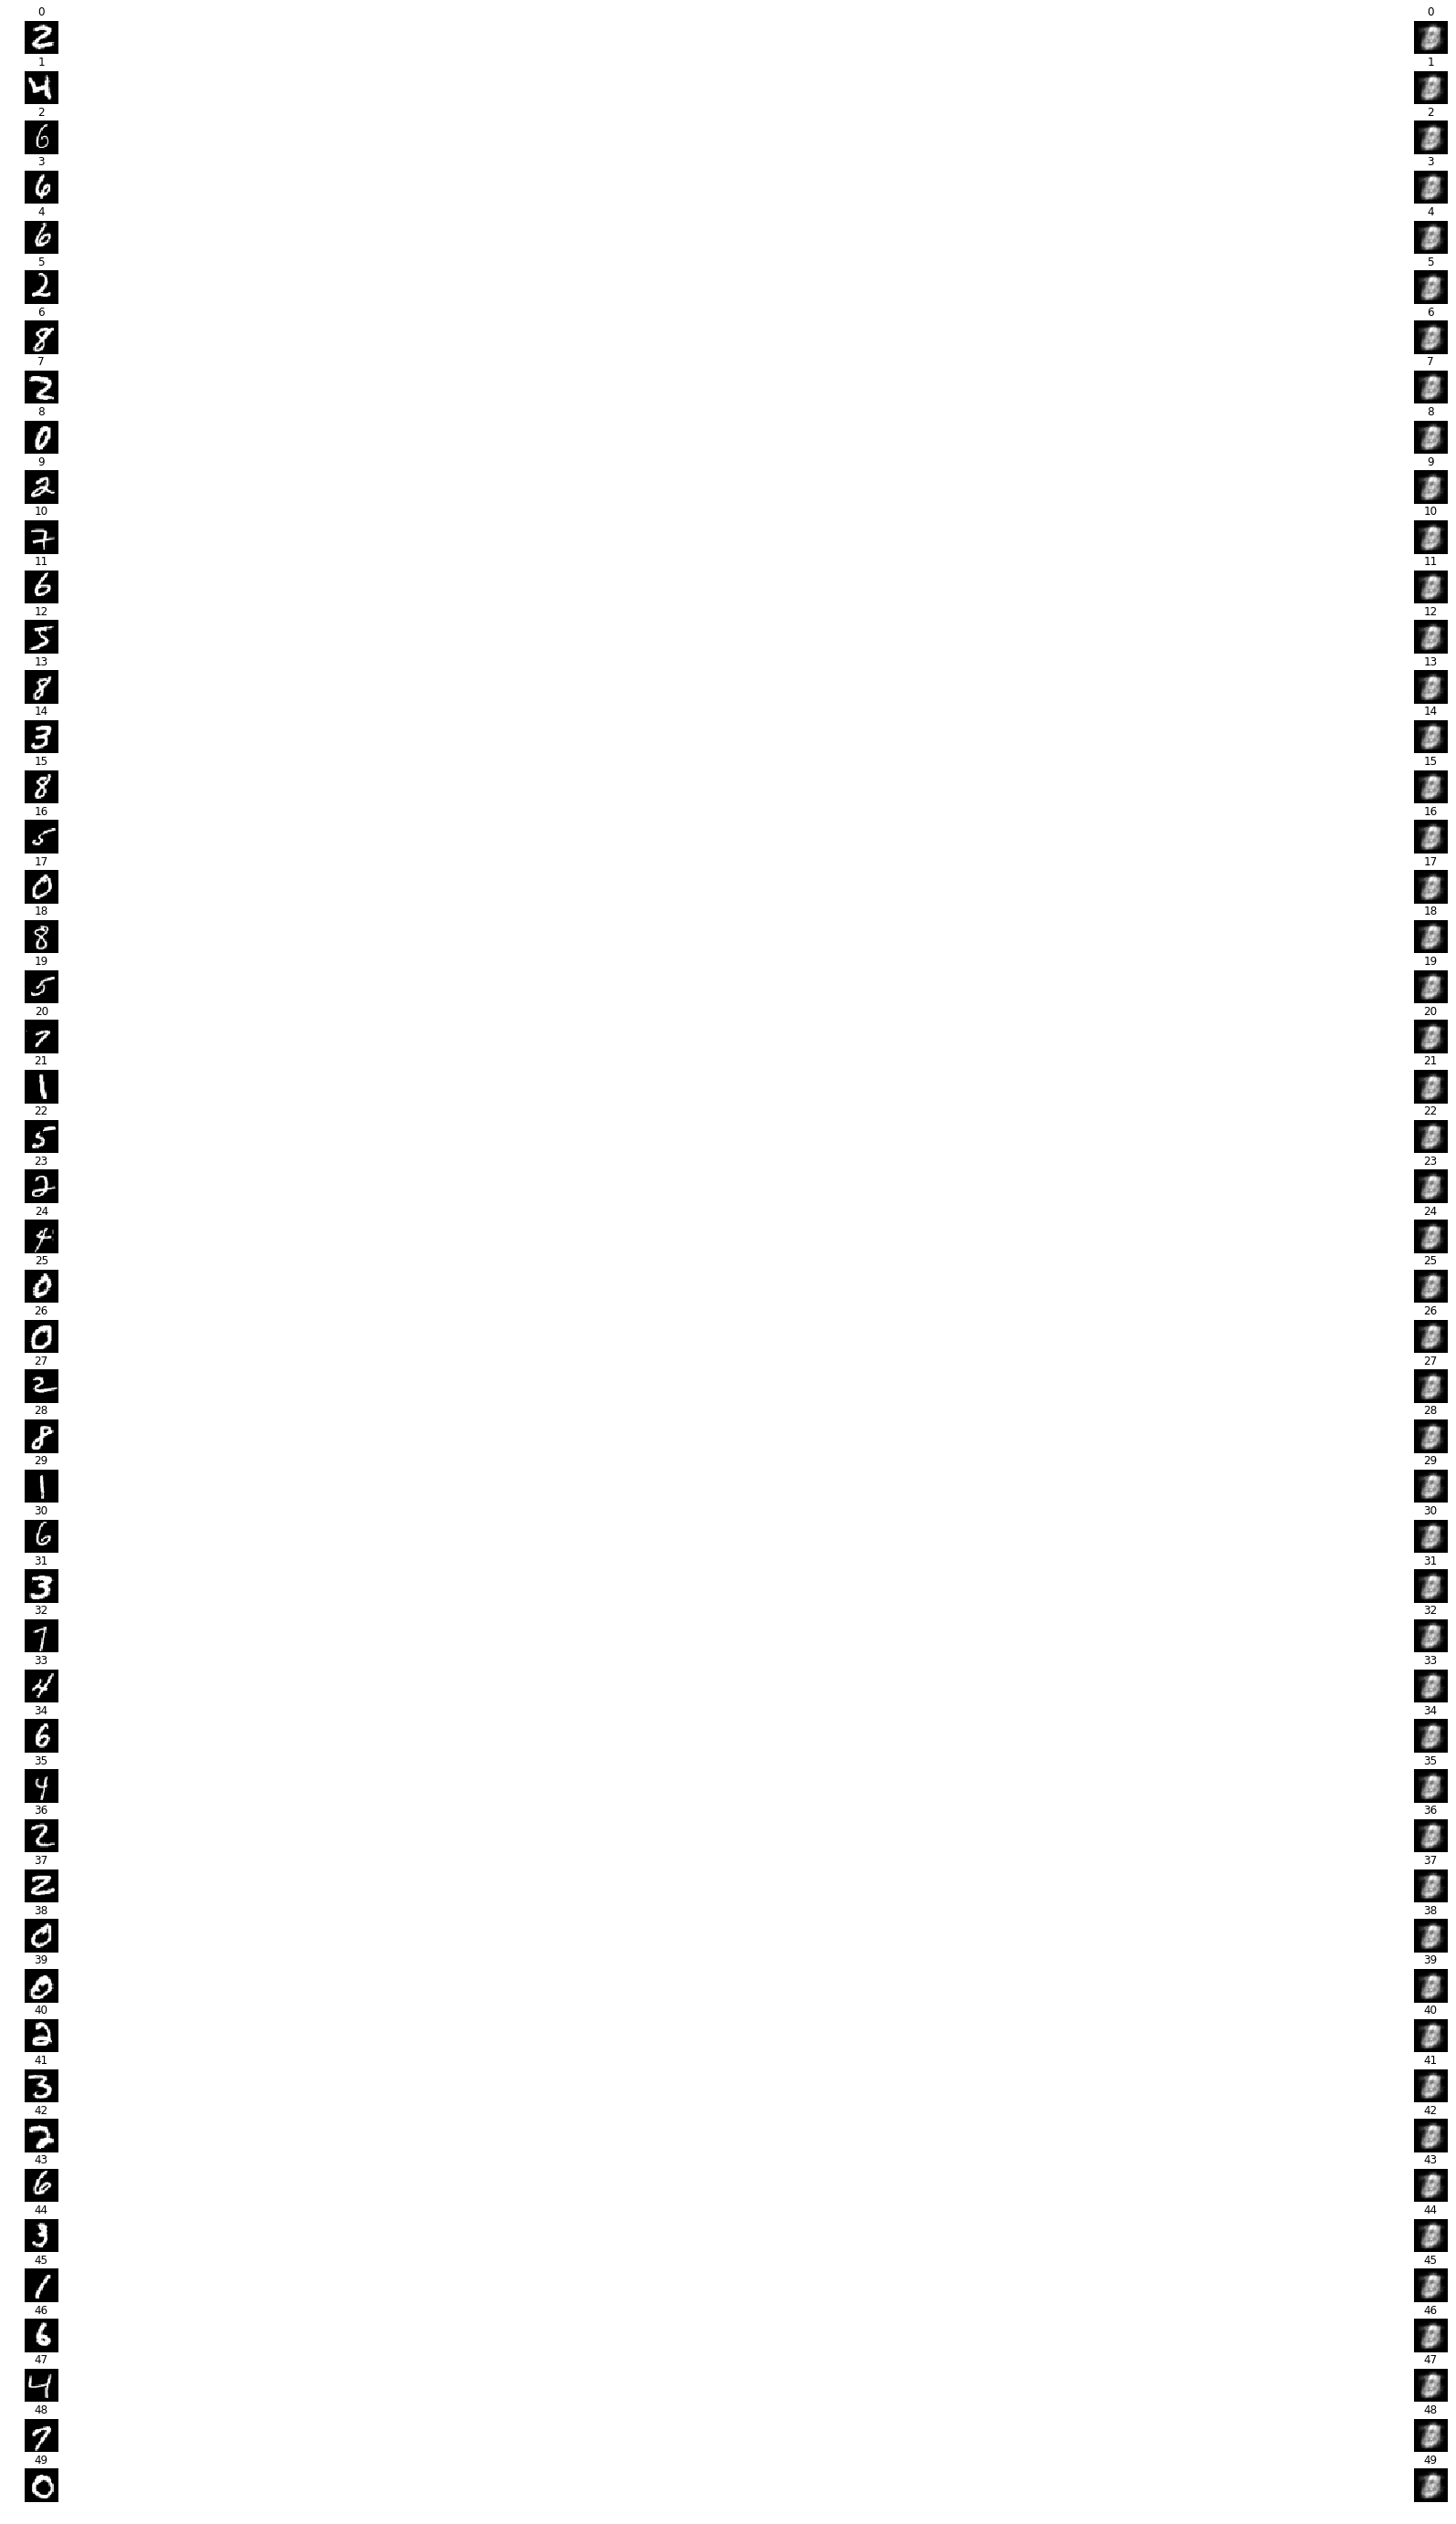

In [37]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_AE(EPOCH,data, model_in, optimizer,size)
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###########################################################################################
####   UPDATE INPUTS
####
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,True)

### Output Data Files

In [34]:
loss_filename='output/nb1_exp2_lossvec.csv'
filenames=['nb1_exp2_tensor', 'nb1_exp2_tensor_d', 'nb1_exp2_omega']
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

In [35]:
for i in range(0,len(filenames)):
    out_file='output/'+filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)

## Experiment #3- Gen 50 Same Class images from rand generator embedding

In [ ]:
img_return_cnt=np.zeros(10)
img_return_cnt[0]=50
img_return_cnt[1]=0
img_return_cnt[2]=0
img_return_cnt[3]=0
img_return_cnt[4]=0
img_return_cnt[5]=0
img_return_cnt[6]=0
img_return_cnt[7]=0
img_return_cnt[8]=0
img_return_cnt[9]=0
rdim=2
batch_size=4
data, labels, indices=gen_rand_data(img_return_cnt,labelset, dataset,rdim)
print(indices)

### Run Code

In [ ]:
model_in = Decoder_2L()
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()

In [ ]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_decoder(EPOCH,data,model_in, optimizer,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###########################################################################################
####   UPDATE INPUTS
####
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size)

### Output Data Files

In [ ]:
loss_filename='output/nb1_exp3_lossvec.csv'
filenames=['nb1_exp3_tensor', 'nb1_exp3_tensor_d', 'nb1_exp3_omega']
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

In [ ]:
for i in range(0,len(filenames)):
    out_file='output/'+filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)

## Experiment #4- Run AE On Same Data

In [ ]:
model_in = AE_2L2D()
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()

### Run Code

In [ ]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_AE(EPOCH,data, model_in, optimizer,size)
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###########################################################################################
####   UPDATE INPUTS
####
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,True)

### Output Results

In [ ]:
loss_filename='output/nb1_exp4_lossvec.csv'
filenames=['nb1_exp4_tensor', 'nb1_exp4_tensor_d', 'nb1_exp4_omega']
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

In [ ]:
for i in range(0,len(filenames)):
    out_file='output/'+filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)

## Experiment #5- RandGen 50 and Run 4L Decoder

In [38]:
rand_gen=np.random.randint(0,9,size=50)
print(rand_gen)

img_return_cnt=np.zeros(10)
for i in rand_gen:
    img_return_cnt[i]+=1
print(img_return_cnt)


indices=get_images(img_return_cnt,labelset, dataset)
ind_shuffle=indices[:]
shuffle(ind_shuffle)
print(ind_shuffle)

[6 4 4 4 8 6 1 7 5 0 5 6 8 0 8 5 4 3 4 3 0 6 6 7 8 1 7 0 2 2 3 3 0 4 5 3 8
 8 2 0 0 3 7 7 5 0 1 6 8 1]
[8. 4. 3. 6. 6. 5. 6. 5. 7. 0.]
[30597, 18626, 5, 24754, 36017, 18625, 5925, 30599, 18624, 24757, 5924, 24758, 7, 48200, 41938, 12665, 0, 41935, 36020, 12666, 12667, 30598, 48205, 4, 30596, 18627, 5926, 18628, 41939, 41936, 48206, 24759, 1, 36018, 3, 2, 36021, 48201, 48202, 18623, 48203, 5923, 41937, 36019, 36022, 30600, 48204, 24756, 6, 24755]


In [ ]:
rdim=2
data, labels=get_randenc_byindex(ind_shuffle, labelset, dataset,rdim)

### Run Code

In [ ]:
model_in =   Decoder_4L()
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()

In [ ]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_decoder(EPOCH,data,model_in, optimizer,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###############################################################################################################################
## UPDATE
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size)

### Output Results

In [ ]:
loss_filename='output/nb1_exp5_lossvec.csv'
filenames=['nb1_exp5_tensor', 'nb1_exp5_tensor_d', 'nb1_exp5_omega']
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

In [ ]:
for i in range(0,len(filenames)):
    out_file='output/'+filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)

## Experiment #6- RandGen 50 and Run 4L AE

### Run Code

In [ ]:
model_in =  AE_4L2D()
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()

In [ ]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_AE(EPOCH,data, model_in, optimizer,size)
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###########################################################################################
####   UPDATE INPUTS
####
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,True)

### Output Results

In [ ]:
loss_filename='output/nb1_exp6_lossvec.csv'
filenames=['nb1_exp6_tensor', 'nb1_exp6_tensor_d', 'nb1_exp6_omega']
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

In [ ]:
for i in range(0,len(filenames)):
    out_file='output/'+filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)

## Experiment #7

### Run Code

### Output Results

## Experiment #8-

### Run Code

### Output Results

# Import Previously Exported Data

In [ ]:
loss_filename_1='output/nb1_exp1_lossvec.csv'
filenames_1=['nb1_exp1_tensor', 'nb1_exp1_tensor_d', 'nb1_exp1_omega']
imp_data_1, test_lossvec_1=import_saved_output(filenames_1,loss_filename_1)

In [ ]:
loss_filename_2='output/exp2_lossvec.csv'
filenames_2=['exp2_tensor', 'exp2_tensor_d', 'exp2_omega']
imp_data_2, test_lossvec_2=import_saved_output(filenames,loss_filename_2)

In [ ]:
loss_filename_6='output/nb1_exp6_lossvec.csv'
filenames_6=['nb1_exp6_tensor', 'nb1_exp6_tensor_d', 'nb1_exp6_omega']
imp_data_6, test_lossvec_6=import_saved_output(filenames_6,loss_filename_6)

In [ ]:
test_tensor=imp_data_1[0]
test_tensor_d=imp_data_1[1] 
test_exp1_omega=imp_data_1[2] 

In [ ]:
torch.all(torch.eq(test_tensor,test_tensor_d))

In [ ]:
len(test_tensor)

In [ ]:
# Data
cnt=len(test_lossvec_1)
cnt_vec=np.arange(0,cnt)
df=pd.DataFrame({'x': cnt_vec, 'exp2': np.asarray(test_lossvec_2), 
                 'exp1': np.asarray(test_lossvec_1)})

plt.plot( 'x', 'exp1', data=df, marker='', markerfacecolor='blue', linewidth=2)
plt.plot( 'x', 'exp2', data=df, marker='', color='pink', linewidth=2)

plt.title('R2Encode')
plt.legend()

In [ ]:
# Data
cnt=len(test_lossvec_6)
cnt_vec=np.arange(0,cnt)
df=pd.DataFrame({'x': cnt_vec,
                 'exp1': np.asarray(test_lossvec_6)})

plt.plot( 'x', 'exp1', data=df, marker='', markerfacecolor='blue', linewidth=2)
#plt.plot( 'x', 'exp2', data=df, marker='', color='pink', linewidth=2)

plt.title('R2Encode')
plt.legend()

In [ ]:
print('')
print(test_lossvec_1[100000])
print(test_lossvec_1[500000])